# COMP90016 - Assignment 2
Version 1. Last edited 14/04/2025

## Semester 1, 2025

In [4]:
NAME = "Hanning Chen"

ID = "1434345"


This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarifications to this document will be announced via the LMS.

Please make sure you review the University's rules on academic integrity: https://academicintegrity.unimelb.edu.au/

You submission must be your own work. Do not copy material from other students, from the internet or from AI tools. 

Your completed notebook file containing all your answers will be turned in via Canvas. Please also submit an HTML file with the output cleared.

To complete the assignment, finish the tasks in this notebook.

The tasks are a combination of writing your own code, interpreting the results and answering related short-answer questions.

In some cases, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are **not** exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

Cells that must be completed to receive marks are clearly labelled. Some cells are code cells, in which you must complete the code to solve a problem. Others are markdown cells, in which you must write your answers to short-answer questions. 

Cells that must be completed to receive marks are labelled like this:

`# -- GRADED CELL (1 mark) - complete this cell --`

Some graded cells are code cells, in which you must complete the code to solve a problem. Other graded cells are markdown cells, in which you must write your answers to short-answer questions. 

You will see the following text in graded code cells:

```
# YOUR CODE HERE
raise NotImplementedError()
```

***You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.***

Only add answers to graded cells. If you want to import a library or use a helper function, this must be included in a graded cell.

Only graded cells will be marked.
**Don't make changes outside graded cells, and don't add or remove cells from the notebook**.

>Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.

>Run-time limits will be imposed for each coding question. The run-time of a code cell can be calculated by including `%time` at the top of your cell. Cells exceeding the run-time limit **will not be marked**. The run-time limits only apply to test cases that are included in this document.

No marks are allocated to commenting in your code. We do however, encourage efficient and well-commented code.

The total marks for the assignment add up to 100, and it will be worth 10% of your overall subject grade.

Part 1: 20 marks

Part 2: 35 marks

Part 3: 30 marks

Part 4: 15 marks

## Submitting

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID at the top of this notebook.


Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.
You must also submit a copy of this notebook in `html` format with the output cleared.
You can do this by using the `clear all output` option in the menu.

Your submission should include **only two** files with names formatted as: **Assignment_2.ipynb** and **Assignment_2.html**

## Overview

In this assignment, you will answer questions about sequence alignment and variant calling.

You will use the `pysam` and `biopython` libraries in your functions. You may want to refer to sections of the documentation for these tools for additional help. Additional to `pysam`, `biopython` and standard Python 3 functions and methods, you may also use any other library we have used in Computational Genomics including `collections`, `numpy`, `pandas`, `math`, `itertools`, `seaborn` and `matplotlib`.

You will also use the following command-line tools: `BLAST`, `BWA` and `Samtools`. 


The following conda command was used to create the binder :

```conda create -n cg_assignment2 bwa samtools pysam biopython matplotlib seaborn blast numpy pandas```


## Setup

In [5]:
import os
import requests
from IPython.core.display import HTML

version = 2025
base_url = f'https://raw.githubusercontent.com/melbournebioinformatics/COMP90016/{version}'

# Function to get data.
def fetch_file(url, outpath='.'):
    response = requests.get(url)
    if response.status_code == 200:
        print('File found!')
        # Get the filename from the URL
        filename = os.path.basename(url).split('?', 1)[0]
        # Construct the filepath using the specified directory and filename
        filepath = os.path.join(outpath, filename)
        # Create the directory if it doesn't exist
        if not os.path.exists(outpath):
            print(f'Creating output dir: {outpath}')
            os.makedirs(outpath)
        # Check if the file already exists in the specified directory
        if os.path.exists(filepath):
            print(f'{filename} already exists in {outpath}. Skip download.')
        else:
            with open(filepath, 'wb') as f:
                f.write(response.content)
                f.close()
            print(f'Saved to: {filepath}')
    else:
        print(f'File not found: Code {response.status_code}')

In [6]:
# Make the notebook pretty

HTML(requests.get(f'{base_url}/common/style/custom.css').text)

In [7]:
# Fetch assignment data
f_names = ["comp90016_assignment_2_S_harrisii_y.fasta",
"comp90016_assignment_2_database.fasta",
"comp90016_assignment_2_dnaA.bam",
"comp90016_assignment_2_dnaA.bam.bai",
"comp90016_assignment_2_dnaA_ref.fasta",
"comp90016_assignment_2_dnaA_ref.fasta.fai",
"comp90016_assignment_2_query.fasta",
"comp90016_assignment_2_reads_R1.fastq.gz",
"comp90016_assignment_2_reads_R2.fastq.gz"]

for filename in f_names:     
    url = f'{base_url}/assignment/02/data/{filename}?raw=true'
    fetch_file(url, './data/')

File found!
Creating output dir: ./data/
Saved to: ./data/comp90016_assignment_2_S_harrisii_y.fasta
File found!
Saved to: ./data/comp90016_assignment_2_database.fasta
File found!
Saved to: ./data/comp90016_assignment_2_dnaA.bam
File found!
Saved to: ./data/comp90016_assignment_2_dnaA.bam.bai
File found!
Saved to: ./data/comp90016_assignment_2_dnaA_ref.fasta
File found!
Saved to: ./data/comp90016_assignment_2_dnaA_ref.fasta.fai
File found!
Saved to: ./data/comp90016_assignment_2_query.fasta
File found!
Saved to: ./data/comp90016_assignment_2_reads_R1.fastq.gz
File found!
Saved to: ./data/comp90016_assignment_2_reads_R2.fastq.gz


## Part 1: BLAST

### Setup

Histamine receptors are a class of evolutionarily-related proteins that bind to histamine and trigger cellular responses. There are four histamine receptor proteins that are found across multiple species. These are referred to as HRH1, HRH2, HRH3 and HRH4.

**comp90016_assignment_2_database.fasta** is a multi-FASTA file containing histamine receptor protein sequences from several species.

**comp90016_assignment_2_query.fasta** is a FASTA file containing a protein sequence of a fragment of an unknown histamine receptor.

We will be using command-line BLAST to execute a search for matches to the query sequence in the database of histamine receptor sequences.

If you would like to use your local computer, BLAST can be installed via [bioconda](https://anaconda.org/bioconda/blast) or downloaded [here](https://www.ncbi.nlm.nih.gov/books/NBK279671/). Otherwise, BLAST is pre-installed on the subject Binder. 

**Execute the following commands to complete the search.**

```
mkdir -p blastdb/
cp data/comp90016_assignment_2_database.fasta blastdb/comp90016_assignment_2_database.fasta

# Build a custom BLAST database using the histamine receptor protein sequences in the blast directory.
makeblastdb -dbtype prot -in blastdb/comp90016_assignment_2_database.fasta -out blastdb/histamine_receptor_db

# Execute a BLAST search against the custom database with the unknown protein sequence as the query.
blastp -query data/comp90016_assignment_2_query.fasta -db blastdb/histamine_receptor_db -outfmt "7 std ppos"
```

### Questions
In the cells below, complete the following tasks:

<div class="question">

<h3> Question 1.1 </h3>

(5 marks, max 50 words)

Based on the results of the BLAST search, predict which type of histamine receptor the query protein sequence fragment originated from (HRH1, HRH2, HRH3 or HRH4). Justify your choice.
    
</div>



#### -- GRADED CELL (5 marks) - complete this cell --

The query protein-sequence most likely originates from HRH3 because 
 - The top ranked sequences are HRH3 with  statistically significant alignments (lowest E-values - close to 0) and highest sequence identity - above 80%;
 - HRH1 and HRH4 have relatively high E-values and low sequence identity;
 - HRH2 doesn't show up.

<div class="question">

<h3> Question 1.2 </h3>

(5 marks, max 50 words)

Interpret the E-value of the top scoring BLAST hit. How confident are you in your BLAST results?
    
</div>



#### -- GRADED CELL (5 marks) - complete this cell --

The top-hit E-value is 1.72e-48 (HRH3_CAVPO) implying the expected number of matches with a similar score that can occur by randomness is approximately 1.72e-48 $\approx 0$. Such an extremely small e-value implies the match is highly significant. We are very confident that the query sequence belongs to the HRH3 receptor.

<div class="question">

<h3> Question 1.3 </h3>

(5 marks, max 50 words)

Suppose you were provided with a nucleotide query sequence as a FASTA file (filename: comp90016_assignment_2_query_nucleotide.fasta). Modify the BLAST command provided above so that it would take the nucleotide query sequence as an input. Use the BLOSUM-80 substitution matrix. Please use the same output format and the same custom database used previously. Note that you are not required to execute this command.
    
</div>



#### -- GRADED CELL (5 marks) - complete this cell --

We do not need to change the second line,  makeblastdb $\cdots$, which builds the protein database. Since we change the query sequence to nucleotide, we need the blastx command as follow
 - blastx -query data/comp90016_assignment_2_query_nucleotide.fasta -db blastdb/histamine_receptor_db -outfmt "7 std ppos" -matrix BLOSUM80

, which matrix argument is specified.

<div class="question">

<h3> Question 1.4 </h3>

(5 marks, max 50 words)

Suppose you execute a BLAST search and the top-scoring result is a match with 100% identity and 100% query coverage.
This search was then repeated using the same parameters, but with additional sequences added to the database so that it was twice the original size. Would the E-value of the top-scoring hit increase, decrease or would it remain the same? Would the run-time of the search increase, decrease or would it remain the same?
    
</div>



#### -- GRADED CELL (5 marks) - complete this cell --

**The E-value of the top-scoring hit will increase**, since E-value is proportional to the database size, given query length and statistical parameters unchanged.
**The run-tim of search will increase** because BLAST has to search through a larger database. 

## Part 2: Sequence Alignment

### Setup

We begin by importing `Biopython` so that we can take advantage of Bio.Align objects for storing and accessing sequence alignments.

In [7]:
from Bio import Align, Seq, SeqRecord

In this section, we will be using amino-acid substitution matrices, encoded as 2D dictionaries. The cell below stores the BLOSUM-62 substitution matrix as a dictionary. The protein sequences used to test your code will only contain the one-letter codes of the 20 standard amino-acids.

In [5]:
BLOSUM_62 = {
    '*':{'*':1,'A':-4,'C':-4,'B':-4,'E':-4,'D':-4,'G':-4,'F':-4,'I':-4,'H':-4,'K':-4,'M':-4,'L':-4,'N':-4,'Q':-4,'P':-4,'S':-4,'R':-4,'T':-4,'W':-4,'V':-4,'Y':-4,'X':-4,'Z':-4},
    'A':{'*':-4,'A':4,'C':0,'B':-2,'E':-1,'D':-2,'G':0,'F':-2,'I':-1,'H':-2,'K':-1,'M':-1,'L':-1,'N':-2,'Q':-1,'P':-1,'S':1,'R':-1,'T':0,'W':-3,'V':0,'Y':-2,'X':-1,'Z':-1},
    'C':{'*':-4,'A':0,'C':9,'B':-3,'E':-4,'D':-3,'G':-3,'F':-2,'I':-1,'H':-3,'K':-3,'M':-1,'L':-1,'N':-3,'Q':-3,'P':-3,'S':-1,'R':-3,'T':-1,'W':-2,'V':-1,'Y':-2,'X':-1,'Z':-3},
    'B':{'*':-4,'A':-2,'C':-3,'B':4,'E':1,'D':4,'G':-1,'F':-3,'I':-3,'H':0,'K':0,'M':-3,'L':-4,'N':3,'Q':0,'P':-2,'S':0,'R':-1,'T':-1,'W':-4,'V':-3,'Y':-3,'X':-1,'Z':1},
    'E':{'*':-4,'A':-1,'C':-4,'B':1,'E':5,'D':2,'G':-2,'F':-3,'I':-3,'H':0,'K':1,'M':-2,'L':-3,'N':0,'Q':2,'P':-1,'S':0,'R':0,'T':-1,'W':-3,'V':-2,'Y':-2,'X':-1,'Z':4},
    'D':{'*':-4,'A':-2,'C':-3,'B':4,'E':2,'D':6,'G':-1,'F':-3,'I':-3,'H':-1,'K':-1,'M':-3,'L':-4,'N':1,'Q':0,'P':-1,'S':0,'R':-2,'T':-1,'W':-4,'V':-3,'Y':-3,'X':-1,'Z':1},
    'G':{'*':-4,'A':0,'C':-3,'B':-1,'E':-2,'D':-1,'G':6,'F':-3,'I':-4,'H':-2,'K':-2,'M':-3,'L':-4,'N':0,'Q':-2,'P':-2,'S':0,'R':-2,'T':-2,'W':-2,'V':-3,'Y':-3,'X':-1,'Z':-2},
    'F':{'*':-4,'A':-2,'C':-2,'B':-3,'E':-3,'D':-3,'G':-3,'F':6,'I':0,'H':-1,'K':-3,'M':0,'L':0,'N':-3,'Q':-3,'P':-4,'S':-2,'R':-3,'T':-2,'W':1,'V':-1,'Y':3,'X':-1,'Z':-3},
    'I':{'*':-4,'A':-1,'C':-1,'B':-3,'E':-3,'D':-3,'G':-4,'F':0,'I':4,'H':-3,'K':-3,'M':1,'L':2,'N':-3,'Q':-3,'P':-3,'S':-2,'R':-3,'T':-1,'W':-3,'V':3,'Y':-1,'X':-1,'Z':-3},
    'H':{'*':-4,'A':-2,'C':-3,'B':0,'E':0,'D':-1,'G':-2,'F':-1,'I':-3,'H':8,'K':-1,'M':-2,'L':-3,'N':1,'Q':0,'P':-2,'S':-1,'R':0,'T':-2,'W':-2,'V':-3,'Y':2,'X':-1,'Z':0},
    'K':{'*':-4,'A':-1,'C':-3,'B':0,'E':1,'D':-1,'G':-2,'F':-3,'I':-3,'H':-1,'K':5,'M':-1,'L':-2,'N':0,'Q':1,'P':-1,'S':0,'R':2,'T':-1,'W':-3,'V':-2,'Y':-2,'X':-1,'Z':1},
    'M':{'*':-4,'A':-1,'C':-1,'B':-3,'E':-2,'D':-3,'G':-3,'F':0,'I':1,'H':-2,'K':-1,'M':5,'L':2,'N':-2,'Q':0,'P':-2,'S':-1,'R':-1,'T':-1,'W':-1,'V':1,'Y':-1,'X':-1,'Z':-1},
    'L':{'*':-4,'A':-1,'C':-1,'B':-4,'E':-3,'D':-4,'G':-4,'F':0,'I':2,'H':-3,'K':-2,'M':2,'L':4,'N':-3,'Q':-2,'P':-3,'S':-2,'R':-2,'T':-1,'W':-2,'V':1,'Y':-1,'X':-1,'Z':-3},
    'N':{'*':-4,'A':-2,'C':-3,'B':3,'E':0,'D':1,'G':0,'F':-3,'I':-3,'H':1,'K':0,'M':-2,'L':-3,'N':6,'Q':0,'P':-2,'S':1,'R':0,'T':0,'W':-4,'V':-3,'Y':-2,'X':-1,'Z':0},
    'Q':{'*':-4,'A':-1,'C':-3,'B':0,'E':2,'D':0,'G':-2,'F':-3,'I':-3,'H':0,'K':1,'M':0,'L':-2,'N':0,'Q':5,'P':-1,'S':0,'R':1,'T':-1,'W':-2,'V':-2,'Y':-1,'X':-1,'Z':3},
    'P':{'*':-4,'A':-1,'C':-3,'B':-2,'E':-1,'D':-1,'G':-2,'F':-4,'I':-3,'H':-2,'K':-1,'M':-2,'L':-3,'N':-2,'Q':-1,'P':7,'S':-1,'R':-2,'T':-1,'W':-4,'V':-2,'Y':-3,'X':-1,'Z':-1},
    'S':{'*':-4,'A':1,'C':-1,'B':0,'E':0,'D':0,'G':0,'F':-2,'I':-2,'H':-1,'K':0,'M':-1,'L':-2,'N':1,'Q':0,'P':-1,'S':4,'R':-1,'T':1,'W':-3,'V':-2,'Y':-2,'X':-1,'Z':0},
    'R':{'*':-4,'A':-1,'C':-3,'B':-1,'E':0,'D':-2,'G':-2,'F':-3,'I':-3,'H':0,'K':2,'M':-1,'L':-2,'N':0,'Q':1,'P':-2,'S':-1,'R':5,'T':-1,'W':-3,'V':-3,'Y':-2,'X':-1,'Z':0},
    'T':{'*':-4,'A':0,'C':-1,'B':-1,'E':-1,'D':-1,'G':-2,'F':-2,'I':-1,'H':-2,'K':-1,'M':-1,'L':-1,'N':0,'Q':-1,'P':-1,'S':1,'R':-1,'T':5,'W':-2,'V':0,'Y':-2,'X':-1,'Z':-1},
    'W':{'*':-4,'A':-3,'C':-2,'B':-4,'E':-3,'D':-4,'G':-2,'F':1,'I':-3,'H':-2,'K':-3,'M':-1,'L':-2,'N':-4,'Q':-2,'P':-4,'S':-3,'R':-3,'T':-2,'W':11,'V':-3,'Y':2,'X':-1,'Z':-3},
    'V':{'*':-4,'A':0,'C':-1,'B':-3,'E':-2,'D':-3,'G':-3,'F':-1,'I':3,'H':-3,'K':-2,'M':1,'L':1,'N':-3,'Q':-2,'P':-2,'S':-2,'R':-3,'T':0,'W':-3,'V':4,'Y':-1,'X':-1,'Z':-2},
    'Y':{'*':-4,'A':-2,'C':-2,'B':-3,'E':-2,'D':-3,'G':-3,'F':3,'I':-1,'H':2,'K':-2,'M':-1,'L':-1,'N':-2,'Q':-1,'P':-3,'S':-2,'R':-2,'T':-2,'W':2,'V':-1,'Y':7,'X':-1,'Z':-2},
    'X':{'*':-4,'A':-1,'C':-1,'B':-1,'E':-1,'D':-1,'G':-1,'F':-1,'I':-1,'H':-1,'K':-1,'M':-1,'L':-1,'N':-1,'Q':-1,'P':-1,'S':-1,'R':-1,'T':-1,'W':-1,'V':-1,'Y':-1,'X':-1,'Z':-1},
    'Z':{'*':-4,'A':-1,'C':-3,'B':1,'E':4,'D':1,'G':-2,'F':-3,'I':-3,'H':0,'K':1,'M':-1,'L':-3,'N':0,'Q':3,'P':-1,'S':0,'R':0,'T':-1,'W':-3,'V':-2,'Y':-2,'X':-1,'Z':4}}

### Questions
In the cells below, complete the following tasks:

<div class="info">
<h3> Question 2.1 </h3>

(10 marks)

<b>Challenge:</b> Write a Python function to calculate the percentage sequence similarity between two aligned protein sequences. The percentage similarity is defined as the number of positions with similar amino acid residues as a percentage of the total number of positions in the alignment. 
    
Two amino acid residues are considered similar based on the input substitution matrix. If two amino acids have a value greater than 0 in their corresponding cell of the input matrix, they are similar. 

- [ ] Input: 
    - Pairwise_aln as a `Bio.Align.MultipleSeqAlignment` object that contains only two aligned sequences.
    - sub_matrix as a 2D dictionary encoding an amino-acid substitution matrix, such as the BLOSUM-62 matrix above.
- [ ] Output:
    - Return a floating-point number between 0 and 100. 
    - Round the output to 4 decimal places.
    - If pairwise_aln does not contain 2 sequences, return None.

</div>

In [10]:
# GRADED CELL 2.1 (10 marks, max 1 min run-time)

def percentage_similarity(pairwise_aln, sub_matrix):
    """
    Calculate the percentage sequence similarity between two aligned protein sequences. 
    Assume that pairwise_aln is an Bio.Align.MultipleSeqAlignment object. 
    Assume sub_matrix is a 2D dictionary encoding an amino-acid substitution matrix. 
    Two amino acid residues are similar if there is a value greater than 0 in the corresponding cell of sub_matrix. 
    The percentage similarity is defined as the number of positions with similar amino acid residues as a percentage of the total number of positions in the alignment.
    Return a floating point number between 0 and 100.
    Round the output to 4 decimal places.
    If pairwise_aln does not contain 2 sequences, return None.
    """
   
    # YOUR CODE HERE
    # Edge case
    if len(pairwise_aln) != 2:
        return None

    seq1, seq2 = pairwise_aln[0], pairwise_aln[1]
    
    similar_loc = 0.0 # float
    seq_length = len(seq1)
    #valid_pos = 0.0
    for aa1, aa2 in zip(seq1.seq, seq2.seq):
        # Skip gaps
        if aa1 == '-' or aa2 == '-':
            continue
        #valid_pos += 1
        if sub_matrix[aa1][aa2] > 0:
            similar_loc += 1 
    
    #percentage = (similar_loc / valid_pos) * 100
    percentage = (similar_loc / seq_length) * 100
    return round(percentage,4)
        

In [9]:
# ~~ Test your function in this cell ~~
demo_sequence_a = SeqRecord.SeqRecord(Seq.Seq("MYWIW"))
demo_sequence_b = SeqRecord.SeqRecord(Seq.Seq("IYW--"))
demo_pairwise_prot_aln = Align.MultipleSeqAlignment([demo_sequence_a, demo_sequence_b])

sequence_a = SeqRecord.SeqRecord(Seq.Seq("MYGEGEPGGWQDHVTVLATRRHPKWAQAWVSTMPWGYECGFSRAWVHQTPWINV-----VSLSSHEAYGVVAVRHPWEIFSPYEVYAPYVQDTQHHGNPGQFTTSCYPDE"))
sequence_b = SeqRecord.SeqRecord(Seq.Seq("MYADGEPGAWQDHMTVLAIYWHHKWAHAWVSTMPWSYECGFSRAWVHQTPWINVIRFTQVSLSSRAWYGILAVRHPWEIFSPYDVYAPYVAATQHHGNPGQFSTSCYP--"))
pairwise_prot_aln = Align.MultipleSeqAlignment([sequence_a, sequence_b])

print(percentage_similarity(demo_pairwise_prot_aln, BLOSUM_62)) # should return 60.0

print(percentage_similarity(pairwise_prot_aln, BLOSUM_62))

60.0
81.8182


In [23]:
# --- AUTOGRADING CELL DO NOT EDIT ----
import math

<div class="info">
<h3> Question 2.2 </h3>

(10 marks)

<b>Challenge:</b> A new scoring system for pairwise protein sequence alignments has been proposed. The score for an alignment is the sum of the scores at each position in the alignment. The score from a match or a mismatch is taken from a given substitution matrix. Gaps are penalised with a gap open and a gap extend penalty. Terminal gaps are treated the same as internal gaps.
 
Write a Python function to compute this score from a pairwise protein alignment. 
- [ ] Input: 
    - Assume that pairwise_aln is an `Bio.Align.MultipleSeqAlignment` object. 
    - Assume sub_matrix is a 2D dictionary encoding an amino-acid substitution matrix. 
    - Assume gap_open and gap_extend are **negative** integers. 
- [ ] Output:
    - Return the score as an integer. 
    - If pairwise_aln does not contain 2 sequences, return None.

</div>


In [27]:
# GRADED CELL 2.2 (10 marks, max 1 min run-time)

def alignment_score(pairwise_aln, sub_matrix, gap_open, gap_extend):
    """
    Compute the alignment score described above from a pairwise protein alignment. 
    Assume that pairwise_aln is an Bio.Align.MultipleSeqAlignment object. 
    Assume sub_matrix is a 2D dictionary encoding an amino-acid substitution matrix. 
    Assume gap_open and gap_extend are negative integers.
    Terminal gaps are treated the same as internal gaps.
    Return the score as an integer. 
    If pairwise_aln does not contain 2 sequences, return None.
    """
   
    # YOUR CODE HERE
    # Edge case
    if len(pairwise_aln) != 2:
        return None

    seq1, seq2 = pairwise_aln[0], pairwise_aln[1]
    score = 0 # int
    # Whether currently in a gap of either sequences
    seq1_in_gap = False
    seq2_in_gap = False

    for aa1, aa2 in zip(seq1.seq, seq2.seq):
        # gap in seq1
        if aa1 == '-' and aa2 != '-':
            if not seq1_in_gap:
                score += gap_open 
                seq1_in_gap = True
            else:
                score += gap_extend

        # gap in seq2
        elif aa1 != '-' and aa2 == '-':
            if not seq2_in_gap:
                score += gap_open
                seq2_in_gap =True
            else:
                score += gap_extend

        # both gaps
        elif aa1 == '-' and aa2 == '-':
            print(f'According to Question 2.3, aligned-gap positions weigh 0. Such positions have been skipped.')
            continue

        # match/mismatch
        elif aa1 != '-' and aa2 != '-':
            score += sub_matrix[aa1][aa2]
            seq1_in_gap = False
            seq2_in_gap = False

    return int(score)
            


In [28]:
# ~~ Test your function in this cell ~~
print(alignment_score(demo_pairwise_prot_aln, BLOSUM_62, -12, -3)) # should return 4

print(alignment_score(pairwise_prot_aln, BLOSUM_62, -12, -3))

4
461


In [16]:
# --- AUTOGRADING CELL DO NOT EDIT ----



In [17]:
# --- AUTOGRADING CELL DO NOT EDIT ----



In [18]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="info">
<h3> Question 2.3 </h3>

(10 marks)

The sum-of-pairs score considers all pairs of characters at each position in an alignment and sums the scores of every pair. For each pair of characters, please score according to the following scoring system:
 
- Match (A|A) = 0
- Mismatch (A|T or A|-) = 1
- Aligned gaps (-|-) = 0
 
<b>Challenge:</b> The higher the score, the more variability at that position. The most variable region is defined as the continuous region of length reg_len with the highest sum-of-pairs score across all positions in the region. 

Write a Python function to identify the most variable region in a multiple sequence alignment. 
- [ ] Input:
    - Assume msa is an `Bio.Align.MultipleSeqAlignment` object. 
    - msa could contain DNA, RNA or protein sequences. 
    - Assume reg_len is a positive integer. 
- [ ] Treat gaps the same as other characters. 
- [ ] Output:  
    - Return a tuple containing the zero-based indices of the first and last position of the most variable region of length reg_len in the MSA. 
    - If there is a tie, return the indices of the region that occurs first in the MSA. 
    - If msa contains fewer than 3 sequences, return None. 
    - If reg_len is greater than the alignment length, return None.

</div>

In [3]:
# GRADED CELL 2.3 (10 marks, max 1 min run-time)

def variable_region(msa, reg_len):
    """
    Identify the most variable region in a multiple sequence alignment. 
    The most variable region is defined as the continuous region of length reg_len with the highest sum-of-pairs score across all positions in the region. 
    Treat gaps the same as other characters. 
    Assume msa is an Bio.Align.MultipleSeqAlignment object. 
    Assume reg_len is a positive integer. 
    Return a tuple containing the zero-based indices of the first and last position of the most variable region of length reg_len in the MSA. 
    msa could contain DNA, RNA or protein sequences. 
    If there is a tie, return the indices of the region that occurs first in the MSA. 
    If msa contains fewer than 3 sequences, return None. 
    If reg_len is greater than the alignment length, return None.
    """
   
    # YOUR CODE HERE
    num_seqs = len(demo_msa_rna)
    alignment_length = msa.get_alignment_length() # or seq_len = len(msa[0])

    # Edge cases
    if num_seqs < 3 or reg_len > alignment_length:
        return None

    column_scores = []
    for pos in range(alignment_length):
        window = [record[pos] for record in msa] # Column window
        col_score = 0.0
        for i in range(num_seqs):
            for j in range(i + 1, num_seqs):
                aa1 = window[i]
                aa2 = window[j]
                if (aa1 == '-' and aa2 == '-') or aa1 == aa2:
                    col_score += 0
                else:
                    col_score +=1

        column_scores.append(col_score)

    # Find the best windows of reg_len with the highest score
    max_score = -1
    max_start = 0
    for start in range(0, alignment_length - reg_len + 1):
        window_score = sum(column_scores[start:start+reg_len])
        # Update if we get a bigger window score
        if window_score > max_score:
            max_score = window_score
            max_start = start

    return (max_start, max_start + reg_len -1)
        
    

In [4]:
# ~~ Test your function in this cell ~~
demo_sequence_c = SeqRecord.SeqRecord(Seq.Seq("CACGAG"))
demo_sequence_d = SeqRecord.SeqRecord(Seq.Seq("GCCGAG"))
demo_sequence_e = SeqRecord.SeqRecord(Seq.Seq("CGCG-G"))
demo_msa_rna = Align.MultipleSeqAlignment([demo_sequence_c, demo_sequence_d, demo_sequence_e])

sequence_c = SeqRecord.SeqRecord(Seq.Seq("AACCCCAUGGUGAAAGCAAUCACAAUGACAUGGUAACCAGGGCUUCUUUUCUUAUUGGACCGCUACGCGUUUUAAGUGAUUAUUUUUAGAGCACUCUGGUAGAACUCUUC"))
sequence_d = SeqRecord.SeqRecord(Seq.Seq("AACCCC------AAAGCAAUCACAAUGACAUGGUUACCAGUGCUUCUUUUCUUAUUGGAGCGCUACGCGCCUUAAGUGAUUAUUUAAAGAGCACUCUGGUAGAACUCU--"))
sequence_e = SeqRecord.SeqRecord(Seq.Seq("AAGCCCAUGGUGAAAGCAAUCACAAUGACUAGGUAACCAGUGCUUCUUUUCUUAAUGGAU-GCUACGCGUUUUAAGUGAUUAUUUAGAGAGCACUCUGGUAGAACUCU--"))
msa_rna = Align.MultipleSeqAlignment([sequence_c, sequence_d, sequence_e])

print(variable_region(demo_msa_rna, 2)) # should return (0,1)

print(variable_region(msa_rna, 10))

(0, 1)
(2, 11)


In [21]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [22]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [23]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="question">

<h3> Question 2.4 </h3>

(5 marks, max 100 words)

Use the [online EMBL-EBI implementation of the MUSCLE MSA algorithm](https://www.ebi.ac.uk/jdispatcher/msa/muscle?stype=protein) to align the sequences found in `blastdb/comp90016_assignment_2_database.fasta`. View the results in the 'Alignments' tab.

Describe the distribution of the regions of similarity across the length of the alignment. Explain how the distribution of regions of similarity can be biologically relevant.
    
</div>



#### -- GRADED CELL (5 marks) - complete this cell --
The alignments show scattered regions of similarity across the sequence, with stretches of conservation appearing intermittently. In comparison, the central and terminal regions have larger gaps and lower conservation (blank regions). Biologically, the conserved regions probably represent essential functional or structural domains, while variable regions may tolerate mutations without affecting protein function, **showing evolutionary flexibility because these changes do not break the protein.** 

## Part 3: Read alignment

### Setup

We begin by importing `pysam` so that we can use it to explore read alignments.

In [8]:
import pysam

**comp90016_assignment_2_S_harrisii_y.fasta** is a FASTA file containing the reference sequence for the Y chromosome of the Tasmanian Devil (*Sarcophilus harrisii*).

**comp90016_assignment_2_reads_R1.fastq.gz** and **comp90016_assignment_2_reads_R2.fastq.gz** are compressed FASTQ files containing short reads.

We will be using the command-line tools `BWA` and `SAMtools` to align the reads to the reference genome and perform some processing.

If you would like to use your personal computer, you can download them using the following links: [BWA installation](https://github.com/lh3/bwa), [SAMtools installation](http://www.htslib.org/download/).

Or install via bioconda: [BWA](https://anaconda.org/bioconda/bwa) and [samtools](https://anaconda.org/bioconda/samtools).

These tools are pre-installed on the subject Binder.

Execute the following code block.

In [9]:
%%bash
# create a working directory to perform the alignment in
mkdir -p align

# Index the reference sequence into the align directory.
bwa index -a is ./data/comp90016_assignment_2_S_harrisii_y.fasta -p align/S_harrissi_y

# change to the align directory
cd align

# Align the reads to the reference
bwa mem S_harrissi_y ../data/comp90016_assignment_2_reads_R1.fastq.gz ../data/comp90016_assignment_2_reads_R2.fastq.gz > alignment.sam

# Sort the aligned reads and convert to BAM.
samtools sort alignment.sam > alignment.bam

# Index the BAM file.
samtools index alignment.bam > alignment.bam.bai

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.04 seconds elapse.
0.00 secex] Update BWT... 
0.00 secex] Pack forward-only FASTA... 
0.00 secex] Construct SA from BWT and Occ... 
[main] Version: 0.7.19-r1273
0016_assignment_2_S_harrisii_y.fasta/S_harrissi_y ./data/comp9
[main] Real time: 0.131 sec; CPU: 0.051 sec
[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 8638 sequences (1295700 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 4307, 0, 0)
orientation FF as there are not enough pairs
orientation FR...nalyzing insert size distribution for 
[M::mem_pestat] (25, 50, 75) percentile: (492, 499, 506)
 computing mean and std.dev: (464, 534) for
[M::mem_pestat] mean and std.dev: (498.86, 10.00)
stat] low and high boundaries for proper pairs: (450, 548)
ere are not enough pairsentation RF as th
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 8638

### Questions
In the cells below, complete the following tasks:

<div class="question">

<h3> Question 3.1 </h3>

(5 marks, max 50 words)

A colleague suggests that instead, you should use the following line of code for the alignment, sorting and compression.
    
Note: There is no need to execute this code.

`bwa mem comp90016_assignment_3_S_harrisii_y.fasta comp90016_assignment_3_reads_R1.fastq.gz comp90016_assignment_3_reads_R2.fastq.gz | samtools sort > alignment.bam`

Explain the difference between these commands and the commands you used previously. Is this a better approach?
    
</div>



#### -- GRADED CELL (5 marks) - complete this cell --

The Colleagues' code
  - Uses a difference reference file rather than BWA-indexed file, less computationally efficient (better to pre-index the reference).
  - Uses pipe to stream alignment results directly to "samtool sort" without .sam-file, saving disk space, and good for large dataset.


<div class="question">

<h3> Question 3.2 </h3>

(5 marks, max 50 words)

Use SAMtools to determine how many of the input reads were aligned to the reference genome. Give the total number of aligned reads and the percentage of the total reads that were aligned. Include any commands you used in the graded cell.
    
</div>



#### -- GRADED CELL (5 marks) - complete this cell --

%samtools flagstats ./align/alignment.bam 

By the outputs, we conclude that there is 8638 reads in total and the percentage of alignment is 99.72%, that is, 8614 reads.

<div class="question">

<h3> Question 3.3 </h3>

(10 marks, max 100 words)
    
Suggest a reason why there are reads in this readset that did not align to the reference genome. Provide supporting evidence using tools and approaches you have learnt during this subject.
    
</div>



#### -- GRADED CELL (10 marks) - complete this cell --

Run 
  - samtools view ./align/alignment.bam | awk '{print $5}' | sort | uniq -c
The output is

24 0 

8614 60

There are 24 poorly-mapped reads. We particularly extract those poorly-mapped positions and output them as .bam file. Apply fastqc to check the summary detecting the following problems
  - **Biased base composition**, suggesting **contamination**, adapters, or low-complexity sequence;
  - **Abnormal GC content**, indicating **non-random sequence**;
  - **Overrepresented sequences**, indicating **certain adapter-like or non-biological sequences dominate**.


### Setup

The following code blocks relate to questions 3.4 and 3.5

In [10]:
# Import your bam file into a pysam.AlignmentFile object
aln = pysam.AlignmentFile('./align/alignment.bam','rb')

In [11]:
# You can use fetch() to access individual aligned reads. For example:
for read in aln.fetch('s_harrisii_sample', 64, 65):
     print(read)

s_harrisii_sample-5050	163	s_harrisii_sample	65	60	150M	s_harrisii_sample	393	478	GGGAGGGCTGAGCTAATTTGCTCCCTTCCTACCTTTTTTTGATGGCAAGCCTGATTCATCAATTTTTTTCTTTCTCTGTTTTAGTCAAGTAGGCCTCTAGAGAGGGGAACATCCCACACCCCTTGGTATGTCGTCTCATGATTGTCATTC	array('B', [34, 34, 34, 38, 38, 38, 38, 38, 38, 38, 38, 38, 16, 38, 41, 41, 38, 38, 38, 38, 41, 38, 38, 41, 41, 41, 41, 41, 38, 41, 38, 38, 16, 38, 38, 7, 41, 41, 38, 41, 41, 38, 38, 38, 41, 38, 41, 38, 38, 41, 38, 41, 38, 38, 41, 34, 34, 38, 41, 38, 41, 41, 41, 38, 38, 38, 38, 34, 34, 34, 41, 41, 38, 41, 38, 38, 34, 38, 34, 38, 34, 34, 38, 38, 38, 38, 38, 38, 16, 34, 38, 38, 38, 34, 38, 38, 34, 34, 38, 16, 34, 38, 41, 41, 41, 34, 41, 38, 38, 23, 38, 38, 28, 38, 23, 34, 38, 38, 28, 28, 38, 28, 34, 34, 23, 38, 34, 34, 38, 34, 38, 38, 34, 38, 34, 34, 34, 38, 34, 34, 23, 16, 38, 38, 34, 38, 34, 38, 38, 38])	[('NM', 0), ('MD', '150'), ('MC', '150M'), ('MQ', 60), ('AS', 150), ('XS', 0)]


In [12]:
# You can use pileup() to access alignment positions. For example:
for pileupcolumn in aln.pileup('s_harrisii_sample', 64, 65):
    # Position in the alignment.
    print('Reference: ', pileupcolumn.pos)
    for pileupread in pileupcolumn.pileups:
        # Position in the read.
        print('Read: ', pileupread.query_position)

Reference:  64
Read:  0
Reference:  65
Read:  1
Reference:  66
Read:  2
Reference:  67
Read:  3
Reference:  68
Read:  4
Reference:  69
Read:  5
Reference:  70
Read:  6
Reference:  71
Read:  7
Reference:  72
Read:  8
Reference:  73
Read:  9
Reference:  74
Read:  10
Reference:  75
Read:  11
Reference:  76
Read:  12
Reference:  77
Read:  13
Reference:  78
Read:  14
Reference:  79
Read:  15
Reference:  80
Read:  16
Reference:  81
Read:  17
Reference:  82
Read:  18
Reference:  83
Read:  19
Reference:  84
Read:  20
Reference:  85
Read:  21
Reference:  86
Read:  22
Reference:  87
Read:  23
Reference:  88
Read:  24
Reference:  89
Read:  25
Reference:  90
Read:  26
Reference:  91
Read:  27
Reference:  92
Read:  28
Reference:  93
Read:  29
Reference:  94
Read:  30
Reference:  95
Read:  31
Reference:  96
Read:  32
Reference:  97
Read:  33
Reference:  98
Read:  34
Reference:  99
Reference:  100
Read:  36
Reference:  101
Read:  37
Reference:  102
Read:  38
Reference:  103
Read:  39
Reference:  104


### Questions
In the cells below, complete the following tasks:

<div class="question">

<h3> Question 3.4 </h3>

(5 marks, max 50 words)

The *LOC116420406* gene is located at positions 46227 to 67944 of the reference sequence (where position 1 is the first base of the reference sequence).

Calculate the mean read depth in the *LOC116420406* gene. Calculate the mean read depth across the whole alignment. Based on your calculations, are the input reads more likely to be from a WES or a WGS experiment? Explain your answer.    
    
</div>



#### -- GRADED CELL (5 marks) - complete this cell --
The mean depth in LOC is $10.1556$. The mean read depth across the entire alignment is $9.9224\approx10$. This implies that the input reads are more likely from a WGS experiment which will show higher coverage only in a specific region (the LOC116420406 region).

<div class="info">
<h3> Question 3.5 </h3>

(5 marks)

<b>Challenge:</b> Write Python code to plot the read depths for the first 2000 bases of the *LOC116420406* gene as a line graph. 
- Plot the read depth on the Y axis and plot the genomic position on the X axis, using the numbering of the reference sequence. 
- [ ] Add appropriate labels to both the X and the Y axes. 
- [ ] Add an appropriate title. 
- [ ] The plot should be produced inline, in the Jupyter notebook. 
- [ ] Your code does not have to include a function.
- [ ] You may use the aln pysam.AlignmentFile object as input.

</div>

In [15]:
# Here's some Jupyter magic to render plots in the notebook
%matplotlib inline

# You may want to import some additional packages for building and formatting your graphs (non-essential)
import numpy as np
import matplotlib.pyplot as plt
import seaborn

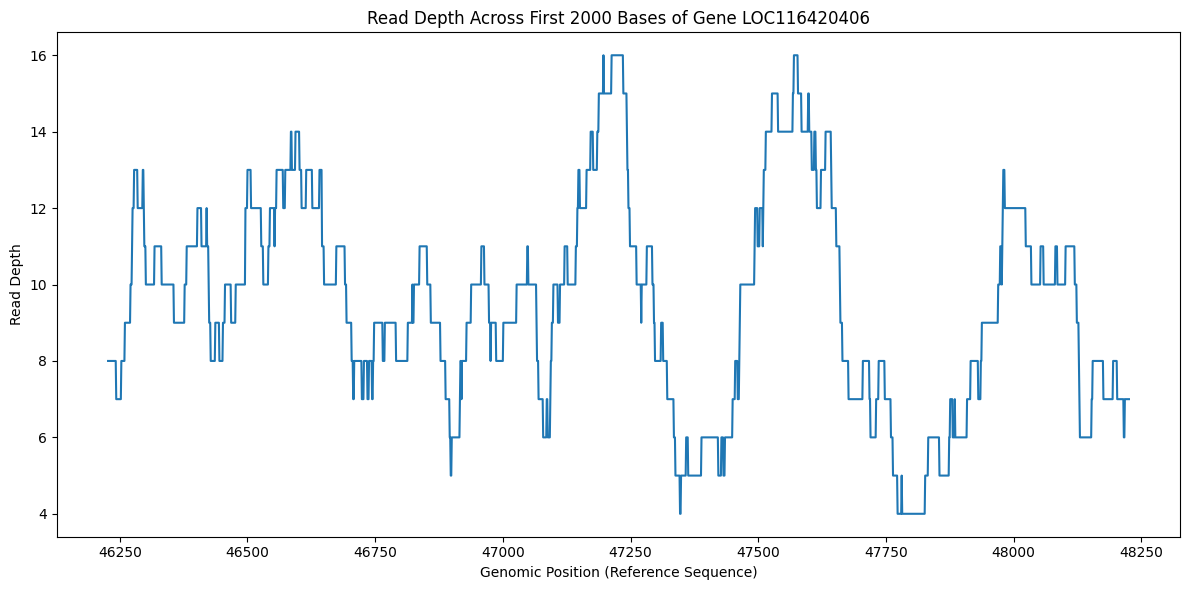

In [18]:
# GRADED CELL 3.5 (5 marks, max 1 min run-time)

# Use this cell to make your plot.

# YOUR CODE HERE
# Define start and end of the first 2000 bases of LOC116420406

#%%bash
#samtools view -h ./align/alignment.bam | awk '$1 ~ /^@/ || $5 == 0' | samtools view -bS - > poorly_mapped.bam
#samtools fastq poorly_mapped.bam > poorly_mapped.fastq
#fastqc poorly_mapped.fastq

#%%bash
#samtools depth -r s_harrisii_sample:46227-67944 ./align/alignment.bam | awk '{sum += $3} END {print sum/NR}'
#samtools depth ./align/alignment.bam | awk '{sum += $3} END {print sum/NR}'

start_pos = 46227
end_pos = start_pos + 2000  # 48227

# Initialize lists for plotting
positions = []
depths = []

# Collect depth data using pileup
for pileupcolumn in aln.pileup('s_harrisii_sample', start=start_pos, stop=end_pos):
    if start_pos <= pileupcolumn.pos + 1 < end_pos:
        positions.append(pileupcolumn.pos + 1)  # Convert from 0-based to 1-based
        depths.append(pileupcolumn.nsegments)  # Read depth at this position

    if pileupcolumn.nsegments != pileupcolumn.n:
        print(f'Indel detected at {pileupcolumn.pos}')


plt.figure(figsize=(12, 6))
seaborn.lineplot(x=positions, y=depths)
plt.xlabel('Genomic Position (Reference Sequence)')
plt.ylabel('Read Depth')
plt.title('Read Depth Across First 2000 Bases of Gene LOC116420406')
plt.tight_layout()
plt.show()

## Part 4: Variant calling

### Setup

Consider the read alignment stored in **data/comp90016_assignment_2_dnaA.bam** (with index file **data/comp90016_assignment_2_dnaA.bam.bai**). Reads have been aligned to the reference sequence **comp90016_assignment_2_dnaA_ref.fasta** (with index file **comp90016_assignment_2_dnaA_ref.fasta.fai**).

We are interested in finding single nucleotide variants (SNVs) where the sequence of the reads is different to the reference sequence.

### Questions
In the cells below, complete the following tasks:

<div class="info">
<h3> Question 4.1 </h3>

(15 marks)

Implement an SNV caller for haploid organisms as a Python function.

Your function should only call SNVs where there are at least 5 reads aligned to that position, and at least 80% of the aligned bases are a specific non-reference allele.

Your function should only call (and output) SNVs (not indels, CNVs or larger variants).

- [ ] Assume ref is the filename of a FASTA file containing a single, linear sequence.
- [ ] Assume ref_idx is the filename of an index file for ref with the extension .fai.
- [ ] Assume alignment is the filename of a BAM file containing reads aligned to the reference sequence ref.
- [ ] Assume alignment_idx is the filename of an index file for alignment with the extension .bai.

You are not required to use all input files in your function.

Return a Pandas dataframe following this VCF-like specification.
- [ ] Include one row for every SNV called.
- [ ] Include the following labelled columns: CHROM POS REF ALT QUAL INFO
- [ ] Set CHROM to the filename of ref (string).
- [ ] Set POS to the 1-based position of the variant relative to the reference sequence (integer).
- [ ] Set REF to the reference allele (string).
- [ ] Set ALT to the non-reference allele (string).
- [ ] Set QUAL to the average mapping quality of the non-reference allele (floating-point number).
- [ ] Set INFO to the allele frequency of the non-reference allele (floating-point number). This is defined as the fraction of the aligned bases that are the ALT allele.

If no SNVs are called, return an empty Pandas dataframe.


</div>

In [ ]:
# GRADED CELL 4.1 (15 marks, max 1 min run-time)

def call_SNVs(ref, ref_idx, alignment, alignment_idx):
    """
    An SNV caller for haploid organisms.
    Only call SNVs where there are at least 5 reads aligned to that position, and at least 80% of the aligned bases are a specific non-reference allele.
    Only call (and output) SNVs (not indels or larger variants).
    Assume ref is the filename of a FASTA file containing a single, linear sequence.
    Assume ref_idx is the filename of an index file for ref with the extension .fai.
    Assume alignment is the filename of a BAM file containing reads aligned to the reference sequence ref.
    Assume alignment_idx is the filename of an index file for alignment with the extension .bai.
    Return a Pandas dataframe following this VCF-like specification.
        - Include one row for every SNV called.
        - Include the following labelled columns: CHROM POS REF ALT QUAL INFO
        - Set CHROM to the filename of ref (string).
        - Set POS to the 1-based position of the variant relative to the reference sequence (integer).
        - Set REF to the reference allele (string).
        - Set ALT to the non-reference allele (string).
        - Set QUAL to the average mapping quality of the non-reference allele (floating-point number).
        - Set INFO to the allele frequency of the non-reference allele (floating-point number). This is defined as the fraction of the aligned bases that are the ATL allele.
    If no SNVs are called, return an empty Pandas dataframe.
    """
   
    # YOUR CODE HERE
    bamfile = pysam.AlignmentFile(alignment, "rb")
    ref_fasta = pysam.FastaFile(ref)

    # Note pileup() func gives pos by pos view of the genome
    records = []
    for pileupcolumn in bamfile.pileup(stepper='all', truncate=True): # only positions within range
        # my little reminder of pilesup-obj indexing
        # pileup_iter = bamfile.pileup()
        # first_column = next(pileup_iter)
        # for pileup in first_column.pileups:
    
        pos = pileupcolumn.pos
        pileup_reads = pileupcolumn.pileups

        # skip edge case - short reads
        if len(pileup_reads) < 5:
            continue

        # base info and mapping quality
        base_count = {}
        base_qualities = {}

        for pileupread in pileup_reads:
            # skip skip-positions and indels
            if pileupread.is_refskip or pileupread.indel != 0:
                continue


            base = pileupread.alignment.query_sequence[pileupread.query_position]
            #print(pileupread.alignment)
            base = base.upper() 
            base_count[base] = base_count.get(base,0) + 1

            if base not in base_qualities:
                base_qualities[base] = []
            base_qualities[base].append(pileupread.alignment.mapping_quality)

            if len(base_count) == 0:
                continue


            # fetch the reference base
            chrom = bamfile.get_reference_name(pileupcolumn.reference_id)
            ref_base = ref_fasta.fetch(chrom, pos, pos + 1).upper()

            # non-reference bases
            non_ref_bases = {b: c for b,c in base_count.items() if b != ref_base}
            if len(non_ref_bases) == 0:
                continue
        
            # find the dominant non-ref allele
            alt_base, alt_count = max(non_ref_bases.items(), key = lambda x: x[1])
            total_count = sum(base_count.values())
            allel_freq = alt_count /total_count

            if allel_freq >= 0.8:
                avg_qual = sum(base_qualities[alt_base]) / len(base_qualities[alt_base])
                records.append({
                    'CHROM': ref,
                    'POS': pos + 1, # convert to 1-based
                    'REF': ref_base,
                    'ALT': alt_base,
                    'QUAL': float(avg_qual),
                    'INFO': float(round(allel_freq, 6))   
                })
            
    bamfile.close()
    ref_fasta.close()

    import pandas as pd # need the pandas library for data type conversion
    if records:
        dataframe = pd.DataFrame(records, columns=["CHROM", "POS", "REF", "ALT", "QUAL", "INFO"])
    else:
        dataframe = pd.DataFrame(columns=["CHROM", "POS", "REF", "ALT", "QUAL", "INFO"])
    
    return dataframe

In [1]:
# ~~ Test your function in this cell ~~
print(call_SNVs('./data/comp90016_assignment_2_dnaA_ref.fasta',
                './data/comp90016_assignment_2_dnaA_ref.fasta.fai',
                './data/comp90016_assignment_2_dnaA.bam',
                './data/comp90016_assignment_2_dnaA.bam.bai'))

# Output should be a pandas dataframe that looks like this:
print(
"""
                                          CHROM  POS REF ALT  QUAL  INFO
0  ./data/comp90016_assignment_2_dnaA_ref.fasta  141   G   A  60.0   1.0
"""
)

NameError: name 'call_SNVs' is not defined

In [ ]:
# --- AUTOGRADING CELL DO NOT EDIT ----



In [ ]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [ ]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [ ]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [ ]:
# --- AUTOGRADING CELL DO NOT EDIT ----


In [ ]:
# --- AUTOGRADING CELL DO NOT EDIT ----


# END OF ASSIGNMENT

## Submitting

Follow these steps to submit your assignment

1) Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2) Make sure you have filled in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

3) **Clear all output** (in the menubar, select Kernel$\rightarrow$Restart & Clear Output)

4) Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.

5) You must also submit a copy of this notebook in `html` format with the output cleared.


Your submission should include **only two** files with names formatted as: **Assignment_2.ipynb** and **Assignment_2.html**
